In [1]:
%matplotlib inline
from selenium import webdriver
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import *
from bs4 import BeautifulSoup

In [2]:
import seaborn as sn
from scipy                 import stats
from scipy.stats           import linregress
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
url = "https://stats.nba.com/teams/hustle/?Season=2018-19&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

df_list = pandas.read_html(table.prettify())

In [4]:
hustle_19_playoffs = df_list[0]
hustle_19_playoffs.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7


In [5]:
hustle_19_playoffs.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested  2PT\xa0Shots',
 'Contested  3PT\xa0Shots',
 'Contested  Shots']

In [6]:
hustle_19_playoffs.rename(columns={'Contested  2PT\xa0Shots': 'Contested 2PT Shots',
                                   'Contested  3PT\xa0Shots': 'Contested 3PT Shots'},
                         inplace=True)
hustle_19_playoffs.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots']

In [8]:
def nba_2019(team):
  return "2019 {:}".format(team)

def nba_2018(team):
  return "2018 {:}".format(team)

def nba_2017(team):
  return "2017 {:}".format(team)

In [9]:
hustle_19_playoffs['TEAM'] = hustle_19_playoffs['TEAM'].map(nba_2019)
hustle_19_playoffs.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7


In [10]:
url = "https://stats.nba.com/teams/hustle/?Season=2017-18&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

df_list2 = pandas.read_html(table.prettify())

In [11]:
hustle_18_playoffs = df_list2[0]
hustle_18_playoffs.rename(columns={'Contested  2PT\xa0Shots': 'Contested 2PT Shots',
                                   'Contested  3PT\xa0Shots': 'Contested 3PT Shots'},
                         inplace=True)
hustle_18_playoffs.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots']

In [13]:
hustle_18_playoffs['TEAM'] = hustle_18_playoffs['TEAM'].map(nba_2018)
hustle_18_playoffs.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2018 Boston Celtics,97.1,7.1,16.8,13.2,5.3,6.2,11.5,46.3,53.7,0.74,35.4,22.8,58.3
1,2018 Cleveland Cavaliers,96.9,9.6,22.2,11.7,5.4,5.0,10.4,51.5,48.0,0.64,34.5,23.1,57.6
2,2018 Golden State Warriors,96.5,9.8,23.6,16.2,5.9,7.9,13.7,42.7,57.3,0.33,40.5,26.0,66.5
3,2018 Houston Rockets,96.0,10.6,24.8,15.1,5.9,7.9,13.8,43.0,57.0,0.47,37.6,21.8,59.5
4,2018 Indiana Pacers,96.0,5.6,13.6,15.1,3.3,5.7,9.0,36.5,63.5,0.86,31.1,27.1,58.3


In [14]:
url = "https://stats.nba.com/teams/hustle/?Season=2016-17&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

df_list3 = pandas.read_html(table.prettify())

In [15]:
hustle_17_playoffs = df_list3[0]
hustle_17_playoffs.rename(columns={'Contested  2PT\xa0Shots': 'Contested 2PT Shots',
                                   'Contested  3PT\xa0Shots': 'Contested 3PT Shots'},
                         inplace=True)
hustle_17_playoffs.columns.to_list()

['TEAM',
 'MIN',
 'Screen  Assists',
 'Screen  Assists PTS',
 'Deflections',
 'OFF Loose Balls  Recovered',
 'DEF Loose Balls  Recovered',
 'Loose Balls  Recovered',
 '% Loose Balls  Recovered OFF',
 '% Loose Balls  Recovered DEF',
 'Charges  Drawn',
 'Contested 2PT Shots',
 'Contested 3PT Shots',
 'Contested  Shots']

In [16]:
hustle_17_playoffs['TEAM'] = hustle_17_playoffs['TEAM'].map(nba_2017)
hustle_17_playoffs.head()

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2017 Atlanta Hawks,96.0,14.0,32.7,13.8,0.0,0.0,11.5,0.0,0.0,2.00,44.5,23.2,67.7
1,2017 Boston Celtics,96.6,9.9,23.1,15.1,0.0,0.0,11.8,0.0,0.0,0.33,38.0,21.3,59.3
2,2017 Chicago Bulls,96.0,10.0,21.5,15.8,0.0,0.0,8.2,0.0,0.0,0.50,36.2,30.5,66.7
3,2017 Cleveland Cavaliers,96.0,10.1,24.1,14.9,0.0,0.0,12.9,0.0,0.0,0.44,36.8,20.8,57.6
4,2017 Golden State Warriors,96.0,8.9,21.4,18.0,0.0,0.0,14.1,0.0,0.0,0.24,38.6,21.1,59.8


In [18]:
playoff_hustle = pd.concat([hustle_19_playoffs, hustle_18_playoffs, hustle_17_playoffs])
playoff_hustle

,TEAM,MIN,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7
5,2019 Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0
6,2019 Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0
7,2019 LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8
8,2019 Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,43.7,26.5,70.1
9,2019 Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,49.0,23.0,72.0


In [19]:
url = "https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2018-19&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

advanced_df_list19 = pandas.read_html(table.prettify())

In [20]:
advanced_19 = advanced_df_list19[0]
advanced_19["TEAM"] = advanced_19["TEAM"].map(nba_2019)
advanced_19.head()

,Unnamed: 0,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,...,AST/TO RANK,AST Ratio RANK,OREB% RANK,DREB% RANK,REB% RANK,TO Ratio RANK,eFG% RANK,TS% RANK,PACE RANK,PIE RANK
0,1,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
advanced_19.columns.to_list()

['Unnamed: 0',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'AST  Ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE',
 'PIE',
 'GP RANK',
 'W RANK',
 'L RANK',
 'MIN RANK',
 'OffRtg RANK',
 'DefRtg RANK',
 'NetRtg RANK',
 'AST% RANK',
 'AST/TO RANK',
 'AST  Ratio RANK',
 'OREB% RANK',
 'DREB% RANK',
 'REB% RANK',
 'TO  Ratio RANK',
 'eFG% RANK',
 'TS% RANK',
 'PACE RANK',
 'PIE RANK']

In [23]:
advanced_19.drop(columns=['GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK'], inplace=True)

advanced_19.drop(columns=["Unnamed: 0"], inplace=True)
advanced_19.head()

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,1.87,17.2,23.9,71.9,48.3,12.4,51.5,56.1,96.25,52.4
1,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
2,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
3,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,1.53,14.6,29.8,69.1,49.1,12.9,50.1,54.1,97.15,47.1
4,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8


In [24]:
url = "https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2017-18&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

advanced_df_list18 = pandas.read_html(table.prettify())

In [25]:
advanced_18 = advanced_df_list18[0]
advanced_18["TEAM"] = advanced_18["TEAM"].map(nba_2018)

advanced_18.drop(columns=['Unnamed: 0','GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK'], inplace=True)

advanced_18.head()

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2018 Golden State Warriors,21,16,5,1013.0,112.7,102.0,10.7,63.2,2.03,19.2,25.5,73.2,50.8,13.1,54.5,58.1,97.73,57.2
1,2018 Cleveland Cavaliers,22,12,10,1066.0,108.3,111.1,-2.8,52.2,1.52,15.3,28.9,74.4,51.3,13.6,51.2,55.0,92.13,48.3
2,2018 Boston Celtics,19,11,8,922.0,107.1,106.2,0.9,58.2,1.82,16.5,25.6,74.7,49.4,12.3,50.0,54.1,93.74,49.9
3,2018 Houston Rockets,17,11,6,816.0,108.5,107.0,1.6,50.6,1.56,14.7,25.1,75.5,49.4,12.5,51.4,55.2,96.56,49.7
4,2018 New Orleans Pelicans,9,5,4,432.0,105.5,107.0,-1.4,62.7,1.86,19.0,21.5,76.2,49.7,13.9,53.3,56.2,103.89,50.4


In [26]:
url = "https://stats.nba.com/teams/advanced/?sort=W&dir=-1&Season=2016-17&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

advanced_df_list17 = pd.read_html(table.prettify())

In [27]:
advanced_17 = advanced_df_list17[0]
advanced_17["TEAM"] = advanced_17["TEAM"].map(nba_2017)

advanced_17.drop(columns=['Unnamed: 0','GP RANK', 'W RANK', 'L RANK',
       'MIN RANK', 'OffRtg RANK', 'DefRtg RANK', 'NetRtg RANK', 'AST% RANK',
       'AST/TO RANK', 'AST  Ratio RANK', 'OREB% RANK', 'DREB% RANK',
       'REB% RANK', 'TO  Ratio RANK', 'eFG% RANK', 'TS% RANK', 'PACE RANK',
       'PIE RANK'], inplace=True)

advanced_17.head()

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2017 Golden State Warriors,17,16,1,816.0,118.2,105.3,12.9,65.8,2.07,20.0,27.8,73.2,52.2,13.5,56.7,60.8,100.68,58.8
1,2017 Cleveland Cavaliers,18,13,5,864.0,119.9,111.8,8.1,53.9,1.69,16.9,26.9,70.4,49.7,13.5,57.9,61.4,96.89,53.8
2,2017 Boston Celtics,18,9,9,869.0,110.4,113.5,-3.1,70.2,2.00,20.1,26.1,68.2,46.8,14.1,53.2,56.6,94.76,48.2
3,2017 San Antonio Spurs,16,8,8,778.0,112.8,111.6,1.2,53.3,1.67,16.2,32.7,73.7,52.6,13.4,51.2,55.1,93.72,50.7
4,2017 Washington Wizards,13,7,6,629.0,110.2,110.5,-0.3,56.8,1.65,16.8,31.5,71.9,51.3,14.0,50.5,54.9,97.18,50.1


In [28]:
playoffs_adv = pd.concat([advanced_19, advanced_18, advanced_17])
playoffs_adv

,TEAM,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Toronto Raptors,24,16,8,1162.0,109.8,104.2,5.6,59.8,1.87,17.2,23.9,71.9,48.3,12.4,51.5,56.1,96.25,52.4
1,2019 Golden State Warriors,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
2,2019 Milwaukee Bucks,15,10,5,730.0,110.7,101.9,8.8,62.8,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
3,2019 Portland Trail Blazers,16,8,8,793.0,109.5,110.6,-1.1,50.1,1.53,14.6,29.8,69.1,49.1,12.9,50.1,54.1,97.15,47.1
4,2019 Denver Nuggets,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8
5,2019 Philadelphia 76ers,12,7,5,576.0,109.1,106.0,3.1,61.9,1.48,17.5,31.9,75.2,54.1,16.6,51.4,55.9,99.63,53.8
6,2019 Houston Rockets,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7
7,2019 Boston Celtics,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2
8,2019 San Antonio Spurs,7,3,4,336.0,110.7,113.1,-2.3,53.6,2.51,16.6,26.4,72.6,49.9,9.0,50.3,54.2,93.14,49.3
9,2019 LA Clippers,6,2,4,288.0,111.5,120.5,-9.0,63.6,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1


In [29]:
url = "https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2018-19&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

trad_df_list19 = pd.read_html(table.prettify())

In [30]:
trad_19 = trad_df_list19[0]
trad_19["TEAM"] = trad_19["TEAM"].map(nba_2019)

trad_19.drop(columns=['Unnamed: 0', 'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'], inplace=True)
trad_19

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,45.1,...,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
1,2019 Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,44.4,...,34.0,42.3,22.5,12.1,8.0,4.6,5.0,22.6,21.8,5.5
2,2019 Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,47.7,...,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4
3,2019 Philadelphia 76ers,12,7,5,0.583,48.0,108.7,39.4,85.8,45.9,...,37.1,48.5,24.4,16.5,6.3,5.4,3.4,22.4,22.1,3.0
4,2019 Boston Celtics,9,5,4,0.556,48.0,102.1,35.7,84.1,42.4,...,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4
5,2019 Houston Rockets,11,6,5,0.545,48.5,108.5,37.2,83.8,44.4,...,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2
6,2019 Denver Nuggets,14,7,7,0.500,49.4,109.1,39.9,90.2,44.3,...,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9
7,2019 Portland Trail Blazers,16,8,8,0.500,49.6,109.7,39.4,90.4,43.6,...,33.8,45.2,19.8,12.9,6.9,5.1,5.9,22.8,22.8,-1.4
8,2019 San Antonio Spurs,7,3,4,0.429,48.0,103.3,39.4,85.1,46.3,...,34.4,45.1,21.1,8.4,4.6,4.0,3.6,19.4,20.0,-1.9
9,2019 LA Clippers,6,2,4,0.333,48.0,114.7,39.8,89.2,44.7,...,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8


In [31]:
url = "https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

trad_df_list18 = pd.read_html(table.prettify())

In [32]:
trad_18 = trad_df_list18[0]
trad_18["TEAM"] = trad_18["TEAM"].map(nba_2018)

trad_18.drop(columns=['Unnamed: 0', 'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'], inplace=True)
trad_18

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2018 Golden State Warriors,21,16,5,0.762,48.2,110.4,41.2,86.0,48.0,...,35.9,45.0,26.0,12.9,7.9,5.8,3.6,19.7,19.4,10.0
1,2018 Houston Rockets,17,11,6,0.647,48.0,104.9,37.2,85.3,43.6,...,34.2,43.0,18.8,12.1,8.1,5.5,4.4,19.1,19.5,1.8
2,2018 Boston Celtics,19,11,8,0.579,48.5,101.4,36.4,83.3,43.7,...,32.8,41.7,21.2,11.6,6.8,4.1,5.6,20.4,21.4,0.7
3,2018 New Orleans Pelicans,9,5,4,0.556,48.0,110.0,42.9,89.8,47.8,...,37.7,45.6,26.9,14.4,8.1,5.0,4.9,19.3,19.0,-0.8
4,2018 Cleveland Cavaliers,22,12,10,0.545,48.5,101.1,36.9,81.9,45.0,...,31.6,41.4,19.2,12.7,6.0,4.4,4.4,19.5,21.9,-1.7
5,2018 Philadelphia 76ers,10,5,5,0.500,48.5,108.8,38.7,88.5,43.7,...,36.1,49.5,25.8,14.6,7.8,4.1,5.9,22.8,25.5,3.9
6,2018 Utah Jazz,11,5,6,0.455,48.0,102.4,37.7,82.9,45.5,...,35.6,45.0,20.3,15.5,7.5,5.0,5.5,20.5,20.9,-2.2
7,2018 Indiana Pacers,7,3,4,0.429,48.0,100.6,38.6,80.1,48.1,...,31.9,40.0,21.1,13.1,8.1,2.7,3.6,21.9,20.3,5.7
8,2018 Milwaukee Bucks,7,3,4,0.429,48.7,101.9,39.1,78.3,50.0,...,33.0,38.6,22.0,13.1,6.6,6.7,4.1,22.9,19.4,-0.6
9,2018 Toronto Raptors,10,4,6,0.400,48.5,107.3,38.9,82.3,47.3,...,30.7,40.1,21.8,14.0,5.7,6.1,4.8,22.6,20.3,-4.4


In [33]:
url = "https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2016-17&SeasonType=Playoffs"
driver = webdriver.Chrome(executable_path=r"C:\Users\chris\OneDrive\nba_hustle_stats\chromedriver.exe")
driver.get(url)
htmlSource = driver.page_source

soup = BeautifulSoup(htmlSource, 'html.parser')
table = soup.find('div', class_='nba-stat-table__overflow')

trad_df_list17 = pd.read_html(table.prettify())

In [34]:
trad_17 = trad_df_list17[0]
trad_17["TEAM"] = trad_17["TEAM"].map(nba_2017)

trad_17.drop(columns=['Unnamed: 0', 'GP RANK', 'W RANK', 'L RANK', 'WIN% RANK', 'MIN RANK', 'PTS RANK',
       'FGM RANK', 'FGA RANK', 'FG% RANK', '3PM RANK', '3PA RANK', '3P% RANK',
       'FTM RANK', 'FTA RANK', 'FT% RANK', 'OREB RANK', 'DREB RANK',
       'REB RANK', 'AST RANK', 'TOV RANK', 'STL RANK', 'BLK RANK', 'BLKA RANK',
       'PF RANK', 'PFD RANK', '+/- RANK'], inplace=True)
trad_17

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2017 Golden State Warriors,17,16,1,0.941,48.0,119.3,42.9,87.0,49.4,...,36.5,45.8,28.2,13.6,8.7,6.1,3.8,21.8,21.6,13.5
1,2017 Cleveland Cavaliers,18,13,5,0.722,48.0,116.2,40.9,83.1,49.3,...,32.9,42.2,22.1,13.1,7.4,4.7,3.8,18.8,22.3,7.9
2,2017 Houston Rockets,11,6,5,0.545,48.5,107.7,37.3,85.0,43.9,...,33.0,42.9,19.5,14.0,7.7,4.6,7.0,20.9,19.5,1.2
3,2017 Washington Wizards,13,7,6,0.538,48.4,108.1,40.1,87.6,45.7,...,31.8,43.0,22.8,13.8,7.9,6.6,4.4,23.0,22.5,0.0
4,2017 Boston Celtics,18,9,9,0.500,48.3,105.2,38.4,84.1,45.7,...,28.5,37.9,26.9,13.4,7.7,4.1,5.2,20.8,19.0,-2.9
5,2017 San Antonio Spurs,16,8,8,0.500,48.6,107.1,40.0,86.6,46.2,...,31.7,44.4,21.3,12.8,7.8,4.7,3.9,18.8,21.3,1.0
6,2017 LA Clippers,7,3,4,0.429,48.0,97.7,36.4,77.0,47.3,...,30.0,37.7,18.4,12.1,6.3,2.4,3.1,20.3,20.9,-1.1
7,2017 Toronto Raptors,10,4,6,0.400,48.0,96.7,35.3,79.5,44.4,...,32.5,39.3,19.6,12.9,7.4,4.4,5.0,20.9,19.9,-5.7
8,2017 Utah Jazz,11,4,7,0.364,48.0,97.8,35.6,78.4,45.5,...,32.4,39.1,19.7,12.1,7.4,3.2,3.3,21.1,20.4,-4.7
9,2017 Atlanta Hawks,6,2,4,0.333,48.0,105.5,37.5,84.5,44.4,...,33.0,44.3,22.3,16.0,6.0,3.3,7.5,21.3,24.8,-1.2


In [37]:
playoff_trad = pd.concat([trad_19, trad_18, trad_17])
playoff_trad

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Milwaukee Bucks,15,10,5,0.667,48.7,112.8,39.8,88.3,45.1,...,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
1,2019 Toronto Raptors,24,16,8,0.667,48.4,106.6,37.7,84.8,44.4,...,34.0,42.3,22.5,12.1,8.0,4.6,5.0,22.6,21.8,5.5
2,2019 Golden State Warriors,22,14,8,0.636,48.5,114.1,41.1,86.1,47.7,...,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4
3,2019 Philadelphia 76ers,12,7,5,0.583,48.0,108.7,39.4,85.8,45.9,...,37.1,48.5,24.4,16.5,6.3,5.4,3.4,22.4,22.1,3.0
4,2019 Boston Celtics,9,5,4,0.556,48.0,102.1,35.7,84.1,42.4,...,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4
5,2019 Houston Rockets,11,6,5,0.545,48.5,108.5,37.2,83.8,44.4,...,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2
6,2019 Denver Nuggets,14,7,7,0.500,49.4,109.1,39.9,90.2,44.3,...,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9
7,2019 Portland Trail Blazers,16,8,8,0.500,49.6,109.7,39.4,90.4,43.6,...,33.8,45.2,19.8,12.9,6.9,5.1,5.9,22.8,22.8,-1.4
8,2019 San Antonio Spurs,7,3,4,0.429,48.0,103.3,39.4,85.1,46.3,...,34.4,45.1,21.1,8.4,4.6,4.0,3.6,19.4,20.0,-1.9
9,2019 LA Clippers,6,2,4,0.333,48.0,114.7,39.8,89.2,44.7,...,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8


In [38]:
hustle_adv = pd.merge(playoff_hustle, playoffs_adv, on='TEAM')
hustle_adv

,TEAM,MIN_x,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,...,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,...,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,...,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,...,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,...,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,...,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6
5,2019 Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,...,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7
6,2019 Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,...,1.73,16.4,19.6,73.7,45.1,12.5,46.1,49.6,95.63,45.4
7,2019 LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,...,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1
8,2019 Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,...,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5
9,2019 Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,...,1.49,16.6,26.4,70.1,48.2,15.1,50.0,54.1,100.90,48.2


In [39]:
hustle_adv.rename(columns={'MIN_y': 'MIN'}, inplace=True)
hustle_adv.drop(columns=["MIN_x"], inplace=True)

hustle_adv.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP', 'W', 'L', 'MIN',
       'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE'],
      dtype='object')

In [40]:
hustle_adv_trad = pd.merge(hustle_adv, playoff_trad, on='TEAM')
hustle_adv_trad

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,...,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,...,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,...,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,...,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,...,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,...,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2
6,2019 Indiana Pacers,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,...,32.3,40.3,20.8,12.0,8.3,3.5,3.0,20.0,19.5,-7.5
7,2019 LA Clippers,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,...,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8
8,2019 Milwaukee Bucks,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,...,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
9,2019 Oklahoma City Thunder,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,...,33.0,43.2,22.6,15.2,6.6,5.4,5.8,24.2,23.4,-5.8


In [41]:
hustle_adv_trad.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP_x', 'W_x', 'L_x',
       'MIN_x', 'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio',
       'OREB%', 'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'GP_y',
       'W_y', 'L_y', 'WIN%', 'MIN_y', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [42]:
hustle_adv_trad.drop(columns=['GP_y', 'W_y', 'L_y', 'MIN_y'], inplace=True)
hustle_adv_trad.rename(columns={'GP_x': 'GP', 'W_x': 'W', 'L_x': 'L', 'MIN_x': 'MIN'}, inplace=True)
hustle_adv_trad.columns

Index(['TEAM', 'Screen  Assists', 'Screen  Assists PTS', 'Deflections',
       'OFF Loose Balls  Recovered', 'DEF Loose Balls  Recovered',
       'Loose Balls  Recovered', '% Loose Balls  Recovered OFF',
       '% Loose Balls  Recovered DEF', 'Charges  Drawn', 'Contested 2PT Shots',
       'Contested 3PT Shots', 'Contested  Shots', 'GP', 'W', 'L', 'MIN',
       'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'AST  Ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE', 'PIE', 'WIN%', 'PTS',
       'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB',
       'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [43]:
hustle_adv_trad['deflection_rate'] = hustle_adv_trad['Deflections']/hustle_adv_trad['PACE']
hustle_adv_trad['loose_ball_recover_rate'] = hustle_adv_trad['Loose Balls  Recovered']/hustle_adv_trad['PACE']
hustle_adv_trad['charges_drawn_rate'] = hustle_adv_trad['Charges  Drawn']/hustle_adv_trad['PACE']
hustle_adv_trad['contest_rate'] = hustle_adv_trad['Contested  Shots']/hustle_adv_trad['PACE']
hustle_adv_trad['contested_2pt_rate'] = hustle_adv_trad['Contested 2PT Shots']/hustle_adv_trad['PACE']
hustle_adv_trad['contested_3pt_rate'] = hustle_adv_trad['Contested 3PT Shots']/hustle_adv_trad['PACE']

In [47]:
hustle_adv_trad

,TEAM,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
0,2019 Boston Celtics,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2,0.556,102.1,35.7,84.1,42.4,11.3,33.0,34.3,19.4,24.2,80.3,7.4,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4,0.113309,0.071563,0.008846,0.567538,0.311102,0.256436
1,2019 Brooklyn Nets,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4,5,1,4,240.0,105.7,115.9,-10.2,50.0,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3,0.200,111.4,38.4,91.4,42.0,11.0,34.0,32.4,23.6,29.2,80.8,11.2,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0,0.115640,0.077725,0.001896,0.610427,0.437915,0.172512
2,2019 Denver Nuggets,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8,0.500,109.1,39.9,90.2,44.3,9.6,27.8,34.4,19.7,25.2,78.2,13.1,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9,0.132365,0.074722,0.004590,0.644748,0.452605,0.192143
3,2019 Detroit Pistons,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0,4,0,4,192.0,96.8,120.5,-23.8,61.3,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4,0.000,98.0,37.5,96.8,38.8,11.0,33.3,33.1,12.0,16.5,72.7,10.8,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8,0.131514,0.062296,0.014832,0.543854,0.309503,0.235341
4,2019 Golden State Warriors,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6,0.636,114.1,41.1,86.1,47.7,12.2,32.7,37.2,19.8,24.3,81.3,10.1,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4,0.137973,0.077103,0.009232,0.646241,0.363194,0.283048
5,2019 Houston Rockets,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7,0.545,108.5,37.2,83.8,44.4,15.6,42.7,36.6,18.5,24.3,76.4,9.6,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2,0.122352,0.079169,0.007506,0.544931,0.315649,0.229282
6,2019 Indiana Pacers,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0,4,0,4,192.0,95.8,103.9,-8.1,61.9,1.73,16.4,19.6,73.7,45.1,12.5,46.1,49.6,95.63,45.4,0.000,91.8,33.5,83.5,40.1,10.0,29.8,33.6,14.8,20.5,72.0,8.0,32.3,40.3,20.8,12.0,8.3,3.5,3.0,20.0,19.5,-7.5,0.112935,0.073199,0.002614,0.481021,0.282338,0.198682
7,2019 LA Clippers,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8,6,2,4,288.0,111.5,120.5,-9.0,63.6,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1,0.333,114.7,39.8,89.2,44.7,11.5,31.7,36.3,23.5,28.8,81.5,10.0,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8,0.118355,0.070819,0.008052,0.570431,0.356034,0.215367
8,2019 Milwaukee Bucks,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,43.7,26.5,70.1,15,10,5,730.0,110.7,101.9,8.8,62.8,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5,0.667,112.8,39.8,88.3,45.1,12.8,38.1,33.6,20.4,28.0,72.9,10.1,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8,0.111365,0.091479,0.007259,0.697027,0.434523,0.263498
9,2019 Oklahoma City Thunder,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,49.0,23.0,72.0,5,1,4,240.0,104.4,109.9,-5.5,59.8,1.49,16.6,26.4,70.1,48.2,15.1,50.0,54.1,100.90,48.2,0.200,105.2,37.8,86.0,44.0,10.4,31.4,33.1,19.2,25.4,75.6,10.2,33.0,43.2,22.6,15.2,6.6,5.4,5.8,24.2,23.4,-5.8,0.116947,0.095144,0.015857,0.713578,0.485629,0.227948


In [44]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

hustle_adv_trad.corr()

,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP,W,L,MIN,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,WIN%,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,deflection_rate,loose_ball_recover_rate,charges_drawn_rate,contest_rate,contested_2pt_rate,contested_3pt_rate
Screen Assists,1.000000,0.987748,0.359559,-0.354955,-0.284687,0.404306,-0.514058,-0.458800,0.082655,0.377156,-0.239081,0.198896,-0.092482,-0.114700,0.002311,-0.093666,0.141965,0.323259,-0.114289,-0.233643,-0.058802,-0.138033,0.269736,-0.132275,0.015311,-0.034627,-0.015134,0.021321,0.056556,-0.169790,-0.126212,0.133367,0.192405,0.148636,0.097893,-0.228608,-0.243203,-0.033385,0.138503,0.098152,0.118840,0.254187,-0.369554,-0.176711,-0.093803,-0.014020,-0.029978,-0.046254,0.192919,0.089676,0.038929,-0.122993,0.332712,0.398090,0.079050,0.173265,0.358909,-0.249783
Screen Assists PTS,0.987748,1.000000,0.378102,-0.346322,-0.268721,0.428328,-0.507335,-0.439513,0.090804,0.349742,-0.238757,0.173115,-0.019663,-0.038042,0.037544,-0.020823,0.175192,0.298802,-0.073475,-0.216180,-0.060742,-0.127798,0.278928,-0.174362,-0.001027,-0.026887,0.010016,0.053784,0.096224,-0.146135,-0.079179,0.190679,0.212548,0.183609,0.090129,-0.132260,-0.160945,-0.003807,0.174048,0.122034,0.148239,0.253709,-0.355648,-0.165089,-0.067730,0.007759,0.008234,-0.041417,0.206258,0.113125,0.060095,-0.082796,0.341331,0.416180,0.086445,0.130375,0.320006,-0.258714
Deflections,0.359559,0.378102,1.000000,-0.235934,-0.118179,0.697377,-0.525140,-0.395330,-0.079308,0.139507,0.076546,0.186815,-0.014688,0.020283,-0.104103,-0.017443,0.031304,-0.059296,0.062377,-0.132254,-0.251198,-0.029906,0.013234,-0.048736,-0.031253,0.234285,0.126663,0.107459,0.017202,0.006277,0.007555,0.017327,0.119807,-0.034096,0.153578,-0.020268,-0.125871,0.183510,-0.160980,-0.200314,0.081253,-0.088809,-0.170203,-0.188737,-0.041794,0.204503,0.569716,0.268221,0.158722,0.099542,-0.185928,0.048279,0.973736,0.695391,-0.068204,0.173891,0.131054,0.070691
OFF Loose Balls Recovered,-0.354955,-0.346322,-0.235934,1.000000,0.926953,-0.038745,0.893866,0.875723,-0.035998,0.115948,0.050352,0.146944,0.041405,0.034506,0.044681,0.042709,-0.152698,-0.208475,0.029664,0.015449,0.055377,-0.025870,-0.213997,0.063646,-0.107524,-0.102268,-0.041884,-0.080656,0.280359,0.010195,-0.009096,0.067760,0.106579,0.221733,-0.074926,0.123422,0.156237,-0.031164,-0.112057,-0.096883,-0.054922,-0.052003,0.259775,0.188232,0.057436,0.003110,0.042147,0.036377,0.004651,0.087914,0.129348,0.021236,-0.301056,-0.081416,-0.049421,0.017408,0.026732,-0.014296
DEF Loose Balls Recovered,-0.284687,-0.268721,-0.118179,0.926953,1.000000,0.072524,0.762342,0.904141,0.024393,0.120458,0.109708,0.191974,0.079242,0.083107,0.039191,0.079972,-0.116441,-0.296310,0.115588,0.063640,0.038553,0.041664,-0.230136,0.060336,-0.072922,-0.041335,0.043257,0.001283,0.300164,0.100369,0.095488,0.106392,0.142821,0.177277,0.005767,0.149079,0.140509,0.047237,-0.104287,-0.074986,-0.082723,-0.131365,0.309510,0.189526,0.116936,0.061129,0.104465,0.123482,0.007332,0.150377,0.127937,0.098274,-0.188069,0.028705,0.011988,0.054739,0.027361,0.039436
Loose Balls Recovered,0.404306,0.428328,0.697377,-0.038745,0.072524,1.000000,-0.431699,-0.312373,-0.090223,0.304042,0.053628,0.328664,0.130929,0.174549,-0.036279,0.126981,0.236664,-0.116547,0.252677,-0.246245,-0.179362,-0.086458,0.045492,-0.117420,0.013765,0.079715,0.280543,0.270970,0.092478,0.164891,0.172048,0.232809,0.255107,-0.005221,0.272590,0.110458,-0.012816,0.210887,0.027568,0.049899,-0.018115,-0.022949,-0.063755,-0.065569,-0.068178,0.102181,0.378373,0.252950,0.155767,-0.049574,-0.091225,0.234831,0.647527,0.989094,-0.090907,0.277430,0.269606,0.028732
% Loose Balls Recovered OFF,-0.514058,-0.507335,-0.525140,0.893866,0.7

In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [46]:
hustle_corr = hustle_adv_trad.corr()

hustle_writer = pd.ExcelWriter("playoff_hustle_correlations.xlsx", engine="xlsxwriter")

hustle_corr.to_excel(hustle_writer, sheet_name="correlations")

hustle_writer.save()

In [68]:
hustle_adv19 = pd.merge(hustle_19_playoffs, advanced_19, on='TEAM')
playoffs_19 = pd.merge(hustle_adv19, trad_19, on='TEAM')
playoffs_19

,TEAM,MIN_x,Screen Assists,Screen Assists PTS,Deflections,OFF Loose Balls Recovered,DEF Loose Balls Recovered,Loose Balls Recovered,% Loose Balls Recovered OFF,% Loose Balls Recovered DEF,Charges Drawn,Contested 2PT Shots,Contested 3PT Shots,Contested Shots,GP_x,W_x,L_x,MIN_y,OffRtg,DefRtg,NetRtg,AST%,AST/TO,AST Ratio,OREB%,DREB%,REB%,TOV%,eFG%,TS%,PACE,PIE,GP_y,W_y,L_y,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,2019 Boston Celtics,96.0,7.2,16.6,11.4,2.3,4.9,7.2,32.3,67.7,0.89,31.3,25.8,57.1,9,5,4,432.0,101.4,103.0,-1.5,60.1,1.45,16.1,22.9,78.3,51.4,14.7,49.1,53.9,100.61,50.2,9,5,4,0.556,48.0,102.1,35.7,84.1,42.4,11.3,33.0,34.3,19.4,24.2,80.3,7.4,40.3,47.8,21.4,14.8,5.9,3.8,4.3,20.8,21.0,-1.4
1,2019 Brooklyn Nets,96.0,13.4,31.2,12.2,3.8,4.4,8.2,46.3,53.7,0.20,46.2,18.2,64.4,5,1,4,240.0,105.7,115.9,-10.2,50.0,1.35,13.8,25.8,64.3,44.1,13.5,48.0,53.4,105.50,41.3,5,1,4,0.200,48.0,111.4,38.4,91.4,42.0,11.0,34.0,32.4,23.6,29.2,80.8,11.2,29.2,40.4,19.2,14.2,7.6,2.8,6.0,22.8,24.2,-11.0
2,2019 Denver Nuggets,98.9,9.6,21.6,12.4,3.5,3.5,7.0,50.0,50.0,0.43,42.4,18.0,60.4,14,7,7,692.0,113.3,111.1,2.2,60.1,2.45,17.6,31.1,70.3,50.5,10.2,49.6,53.9,93.68,51.8,14,7,7,0.500,49.4,109.1,39.9,90.2,44.3,9.6,27.8,34.4,19.7,25.2,78.2,13.1,34.6,47.7,24.0,9.8,5.7,4.6,4.7,21.3,21.9,1.9
3,2019 Detroit Pistons,96.0,11.0,25.0,13.3,2.5,3.8,6.3,40.0,60.0,1.50,31.3,23.8,55.0,4,0,4,192.0,96.8,120.5,-23.8,61.3,2.19,16.5,24.8,72.7,45.2,10.4,44.4,47.1,101.13,35.4,4,0,4,0.000,48.0,98.0,37.5,96.8,38.8,11.0,33.3,33.1,12.0,16.5,72.7,10.8,31.5,42.3,23.0,10.5,7.3,4.0,8.8,24.3,20.0,-23.8
4,2019 Golden State Warriors,96.9,8.1,20.6,13.6,3.4,4.2,7.6,44.3,55.7,0.91,35.8,27.9,63.7,22,14,8,1066.0,114.6,111.5,3.1,69.1,1.91,20.0,30.1,71.4,51.3,15.0,54.8,58.9,98.57,53.6,22,14,8,0.636,48.5,114.1,41.1,86.1,47.7,12.2,32.7,37.2,19.8,24.3,81.3,10.1,33.2,43.3,28.4,14.9,7.4,5.7,3.9,23.2,22.3,3.4
5,2019 Houston Rockets,96.9,5.5,12.8,11.9,3.8,3.9,7.7,49.4,50.6,0.73,30.7,22.3,53.0,11,6,5,533.0,110.5,107.4,3.0,49.1,1.16,14.1,28.7,68.7,49.1,16.1,53.7,57.4,97.26,49.7,11,6,5,0.545,48.5,108.5,37.2,83.8,44.4,15.6,42.7,36.6,18.5,24.3,76.4,9.6,33.3,42.9,18.3,15.8,8.5,5.1,4.6,21.6,21.5,3.2
6,2019 Indiana Pacers,96.0,6.5,15.5,10.8,4.0,3.0,7.0,57.1,42.9,0.25,27.0,19.0,46.0,4,0,4,192.0,95.8,103.9,-8.1,61.9,1.73,16.4,19.6,73.7,45.1,12.5,46.1,49.6,95.63,45.4,4,0,4,0.000,48.0,91.8,33.5,83.5,40.1,10.0,29.8,33.6,14.8,20.5,72.0,8.0,32.3,40.3,20.8,12.0,8.3,3.5,3.0,20.0,19.5,-7.5
7,2019 LA Clippers,96.0,6.8,15.3,12.2,3.8,3.5,7.3,52.3,47.7,0.83,36.7,22.2,58.8,6,2,4,288.0,111.5,120.5,-9.0,63.6,1.69,17.7,29.3,71.4,49.0,14.6,51.1,56.3,103.08,43.1,6,2,4,0.333,48.0,114.7,39.8,89.2,44.7,11.5,31.7,36.3,23.5,28.8,81.5,10.0,30.2,40.2,25.3,15.0,8.0,3.3,7.5,25.0,25.8,-9.8
8,2019 Milwaukee Bucks,97.3,4.5,10.3,11.2,4.0,5.2,9.2,43.5,56.5,0.73,43.7,26.5,70.1,15,10,5,730.0,110.7,101.9,8.8,62.8,1.92,17.8,25.9,77.6,52.6,12.8,52.3,56.0,100.57,55.5,15,10,5,0.667,48.7,112.8,39.8,88.3,45.1,12.8,38.1,33.6,20.4,28.0,72.9,10.1,41.8,51.9,25.0,13.0,6.7,6.4,4.7,21.8,23.3,8.8
9,2019 Oklahoma City Thunder,96.0,8.2,17.2,11.8,5.0,4.6,9.6,52.1,47.9,1.60,49.0,23.0,72.0,5,1,4,240.0,104.4,109.9,-5.5,59.8,1.49,16.6,26.4,70.1,48.2,15.1,50.0,54.1,100.90,48.2,5,1,4,0.200,48.0,105.2,37.8,86.0,44.0,10.4,31.4,33.1,19.2,25.4,75.6,10.2,33.0,43.2,22.6,15.2,6.6,5.4,5.8,24.2,23.4,-5.8


In [69]:
playoffs_19['deflection_rate'] = playoffs_19['Deflections']/playoffs_19['PACE']
playoffs_19['loose_ball_recover_rate'] = playoffs_19['Loose Balls  Recovered']/playoffs_19['PACE']
playoffs_19['charges_drawn_rate'] = playoffs_19['Charges  Drawn']/playoffs_19['PACE']
playoffs_19['contest_rate'] = playoffs_19['Contested  Shots']/playoffs_19['PACE']
playoffs_19['contested_2pt_rate'] = playoffs_19['Contested 2PT Shots']/playoffs_19['PACE']
playoffs_19['contested_3pt_rate'] = playoffs_19['Contested 3PT Shots']/playoffs_19['PACE']

In [70]:
defense_only19 = playoffs_19[['contested_2pt_rate', 'contested_3pt_rate', 'contest_rate', 'charges_drawn_rate',
                              'deflection_rate', 'loose_ball_recover_rate', 'STL', 'BLK', 'DREB%','DefRtg','NetRtg']]
defense_only19.head()

,contested_2pt_rate,contested_3pt_rate,contest_rate,charges_drawn_rate,deflection_rate,loose_ball_recover_rate,STL,BLK,DREB%,DefRtg,NetRtg
0,0.311102,0.256436,0.567538,0.008846,0.113309,0.071563,5.9,3.8,78.3,103.0,-1.5
1,0.437915,0.172512,0.610427,0.001896,0.115640,0.077725,7.6,2.8,64.3,115.9,-10.2
2,0.452605,0.192143,0.644748,0.004590,0.132365,0.074722,5.7,4.6,70.3,111.1,2.2
3,0.309503,0.235341,0.543854,0.014832,0.131514,0.062296,7.3,4.0,72.7,120.5,-23.8
4,0.363194,0.283048,0.646241,0.009232,0.137973,0.077103,7.4,5.7,71.4,111.5,3.1


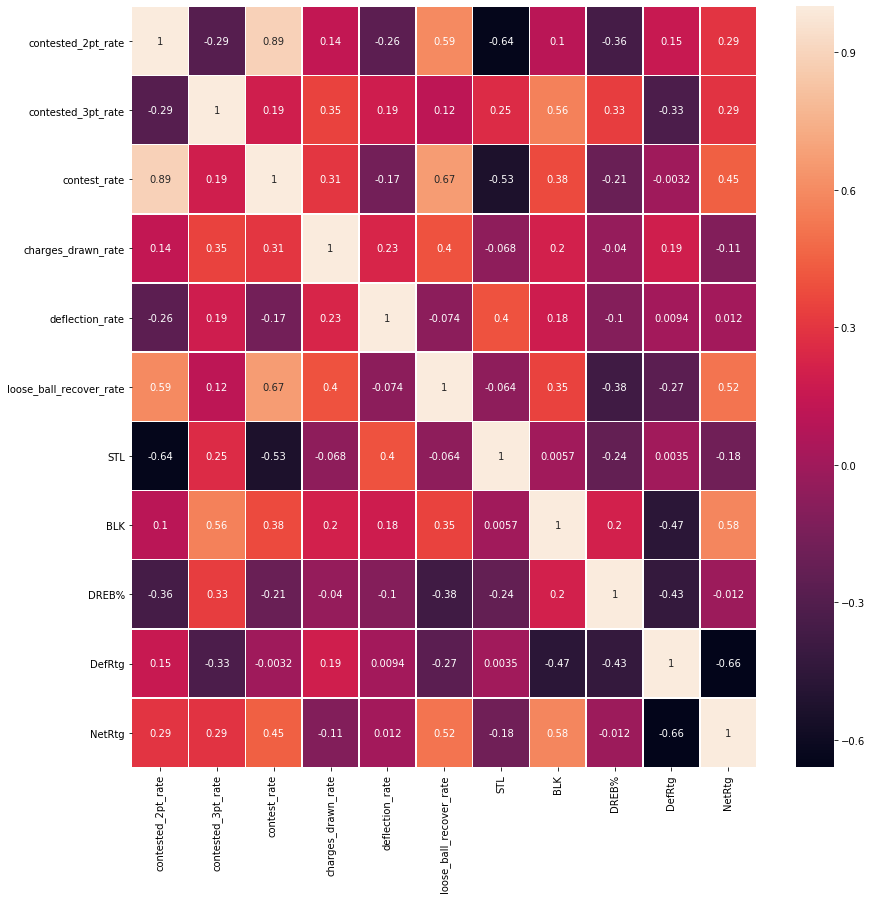

In [71]:
fig, ax = plt.subplots(figsize=(14,14))

sn.heatmap(defense_only19.corr(), annot=True, linewidths=0.5, ax=ax)